CONTACT CENTER SIMULATION

In [2]:
from simulation import run_Simulation, plotHistogram
import random
import pandas as pd
import simpy
import numpy as np
import ipysheet
from ipysheet import sheet,cell,column,row,to_dataframe
import matplotlib.pyplot as plt


Create the parameters for the simulation:
- Arrivals: rate of calls arriving in contact center
- SIM_TIME: how long the simulation will run for
- svc_lvl_thresh: the threshold for calculating service level
- NUM_SIMS: the number of simulations run
- pct_start_on_call: the percentage of agents that begin the simulation on a call

In [4]:
# This creates the spreadsheet for user to enter the simulation parameters
sim_sheet = sheet(rows=1,columns=5,column_headers=['Arrivals','SIM_TIME','svc_lvl_thresh','NUM_SIMS','pct_start_on_call'])
row(0,[1,600,30,100,0.95])
sim_sheet

Sheet(cells=(Cell(column_start=0, row_end=0, row_start=0, squeeze_column=False, type='numeric', value=[1, 600,…

In [7]:
# Run this cell to generate the parameter dataframe for the simulation
sim_params = to_dataframe(sim_sheet)
print(sim_params)

   Arrivals  SIM_TIME  svc_lvl_thresh  NUM_SIMS  pct_start_on_call
0         1       600              30        10               0.95


Create the parameters for each tier:
- Tier: the label of each tier
- Talk_mu: the mean of talk time
- Wrap_mu: the mean of wrap time (time spent working after call)
- Hold_mu: the mean of hold time (time with caller on hold)
- Talk_std: the standard deviation of talk time
- Wrap_std: the standard deviation of wrap time
- Hold_std: the standard deviation of hold time
- Volume: the cumulative percent of volume for each tier
- Patience: the average patience of the caller (standard deviation is 60)
- Transfer: the percent of calls transferred
- Agents: the number of agents in each tier

Note: all times are in seconds. 
The volume percentage is cumulative: for example, values of [0.5,0.75,1] will create 50% of the calls in the first tier, 25% in the second, and 25% in the third. 

In [4]:
# Code to generate ipysheet for tier params based on user input for number of tiers

# update num_tiers to the number of tiers in call center
num_tiers = 3

tier_sheet = sheet(rows=num_tiers,columns=11,column_headers=['Tier','Talk_mu','Wrap_mu','Hold_mu','Talk_std',\
    'Wrap_std','Hold_std','Volume','Patience','Transfer','Agents'])
i = 0
for i in range(num_tiers):
    row(i,[0,0,0,0,0,0,0,0,0,0,0])

tier_sheet

Sheet(cells=(Cell(column_end=10, column_start=0, row_end=0, row_start=0, squeeze_column=False, type='numeric',…

In [5]:
tier_params = to_dataframe(tier_sheet)
print(tier_params)

   Tier  Talk_mu  Wrap_mu  Hold_mu  Talk_std  Wrap_std  Hold_std  Volume  \
0     0        0        0        0         0         0         0       0   
1     0        0        0        0         0         0         0       0   
2     0        0        0        0         0         0         0       0   

   Patience  Transfer  Agents  
0         0         0       0  
1         0         0       0  
2         0         0       0  


In [8]:
"""
This is an example of tier parameters for 3 tiers (without using ipysheet entry)
Uncomment the lines below to generate the example tier_params values for the simulation.
"""

"""
tier_params_dict = {'Tier':['T1','T2','T3'],'Talk_mu':[397,487,396],'Wrap_mu':[62,95,79],'Hold_mu':[83,97,87],'Talk_std':[60,79,90],\
    'Wrap_std':[20,40,47],'Hold_std':[20,34,52],'Volume':[0.7,0.97,1],'Patience':[320,480,240],'Transfer':[0.3,0.22,0.34],'Agents':[321,94,9]}
tier_params = pd.DataFrame(tier_params_dict)
"""

In [9]:
# This runs the simulation using the parameters defined above and creates the results dataframe
results  = run_Simulation(sim_params,tier_params)

      Entered  Offered  Handled      Talk_Time      Ans_Time     Hold_Time  \
Tier                                                                         
T1      699.7    631.9    573.3  227662.804807  53182.870170  47669.875393   
T2      267.4    149.3    112.7   55197.086070   8754.951897  11161.822467   
T3       28.6     23.9     12.7    5110.801947    802.410111   1150.246381   

         Wrap_Time  Transfer  Abandon  Within_Svc_Lvl  Iteration  Abndn_pct  \
Tier                                                                          
T1    35384.221020     172.1     58.6           321.1        4.5   0.092489   
T2    10624.329736      26.7     36.6            94.8        4.5   0.240556   
T3      959.448728       4.8     11.2             8.3        4.5   0.464368   

        Avg_Talk   Svc_Lvl        ASA  
Tier                                   
T1    397.119714  0.508328  92.785685  
T2    489.834607  0.638957  77.397323  
T3    404.702989  0.356738  61.473019  


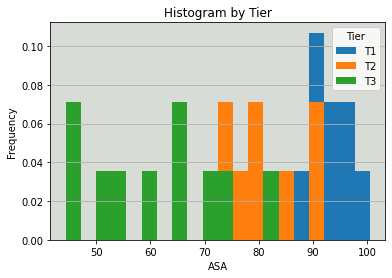

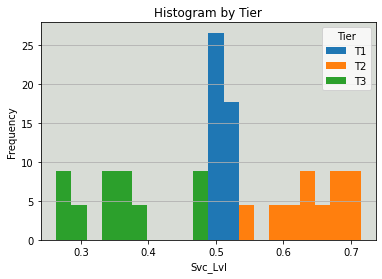

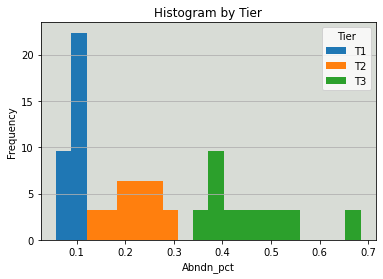

In [10]:
# code for presenting histogram of results

plotHistogram(results,'ASA')
plotHistogram(results,'Svc_Lvl')
plotHistogram(results,'Abndn_pct')

In [ ]:
# code for running multiple simulation scenarios